In [142]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
#random seed for reproducibility
np.random.seed(42)

In [121]:
df=pd.read_csv('new_retail_data.csv')

In [122]:
df.head(-20)

,Unnamed: 0,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301981,301985,8947698.0,66436.0,Joseph Soto,Debbie6@gmail.com,4.175545e+09,05208 Collins Walks Apt. 235,Darwin,New South Wales,16396.0,...,1193.063860,Home Decor,Home Depot,Tools,Good,Standard,Cash,Pending,4.0,Saw
301982,301986,1648101.0,53653.0,Jill Torres,Tyler34@gmail.com,5.656304e+09,5534 Carrie Summit,Sydney,New South Wales,80230.0,...,156.764318,Grocery,Pepsi,Soft Drink,Good,Same-Day,Cash,Delivered,4.0,Fruit punch
301983,301987,4957231.0,85053.0,Alexandra Brown,Leslie14@gmail.com,6.962626e+09,82574 Morrow Parks,Omaha,Minnesota,55366.0,...,1514.269041,Grocery,Pepsi,Soft Drink,Good,Same-Day,Cash,Delivered,4.0,Lemon-lime soda
301984,301988,1554068.0,72401.0,Matthew Miller,Ashley11@gmail.com,7.507493e+09,8471 Dana Station,Bielefeld,Berlin,34228.0,...,1729.573700,Clothing,Zara,Dress,Good,Express,Cash,Shipped,4.0,Fit and flare dress


In [ ]:
print("Dataset shape:", df.shape)
print("\nNumber of duplicates:", df.duplicated().sum())

# Drop duplicates if it required
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

Dataset shape: (302006, 31)

Number of duplicates: 0
Shape after dropping duplicates: (302006, 31)


Data processing for customer segmentation 

In [ ]:
# convert to datetime and extract features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# droping orignal column of data bcz we will use features of datetime from the same column
df = df.drop(['Date', 'Time'], axis=1)

# Encode categorical variables
categorical_cols = ['Gender', 'Income', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Product_Category', 'Product_Brand', 'Product_Type']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# target variable
target_encoder = LabelEncoder()
df['Customer_Segment'] = target_encoder.fit_transform(df['Customer_Segment'])

print("Customer Segment Mapping:")
for i, segment in enumerate(target_encoder.classes_):
    print(f"{i}: {segment}")

Customer Segment Mapping:
0: New
1: Premium
2: Regular


Features selection and train test split

In [139]:
# Select features and set target
features = ['Age', 'Gender', 'Income', 'Total_Purchases', 'Amount', 'Total_Amount', 
            'Product_Category', 'Product_Brand', 'Ratings', 'Year', 'Month', 'Day',
            'Shipping_Method', 'Payment_Method']

X = df[features]
y = df['Customer_Segment']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (211404, 14)
Test set shape: (90602, 14)


Decssion tree

Decision Tree Classifier Results:
Accuracy: 0.5227147303591532

Classification Report:
              precision    recall  f1-score   support

         New       0.56      0.28      0.37     27190
     Premium       0.23      0.00      0.00     19412
     Regular       0.52      0.90      0.66     44000

    accuracy                           0.52     90602
   macro avg       0.44      0.39      0.34     90602
weighted avg       0.47      0.52      0.43     90602



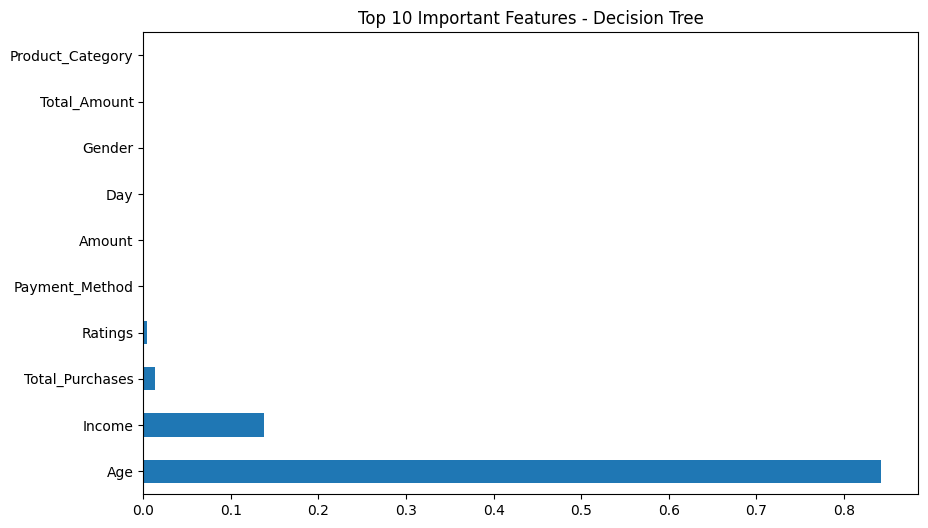

In [ ]:
# Initialize and train Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=target_encoder.classes_))

# Plot feature
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(dt.feature_importances_, index=features)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features - Decision Tree')
plt.show()

Random Forest classifier

Random Forest Classifier Results:
Accuracy: 0.5092382066621046

Classification Report:
              precision    recall  f1-score   support

         New       0.44      0.42      0.43     27190
     Premium       0.32      0.20      0.25     19412
     Regular       0.59      0.70      0.64     44000

    accuracy                           0.51     90602
   macro avg       0.45      0.44      0.44     90602
weighted avg       0.49      0.51      0.49     90602



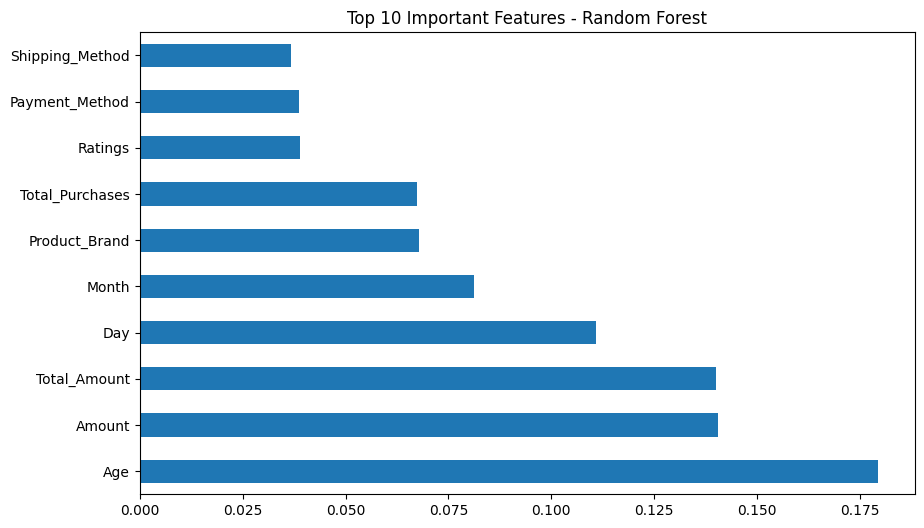

In [ ]:
# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=target_encoder.classes_))

# Plot feature
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf.feature_importances_, index=features)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features - Random Forest')
plt.show()

Logistic Regression

In [144]:
# I am using here copy of scaled data 
X_train_logreg = X_train_scaled.copy()
X_test_logreg = X_test_scaled.copy()

print("NaN values in training set before imputation:", np.isnan(X_train_logreg).sum())
print("NaN values in test set before imputation:", np.isnan(X_test_logreg).sum())
# Create imputer
imputer = SimpleImputer(strategy='mean')
X_train_logreg = imputer.fit_transform(X_train_logreg)

#  use test Transform test data
X_test_logreg = imputer.transform(X_test_logreg)

print("\nNaN values in training set after imputation:", np.isnan(X_train_logreg).sum())
print("NaN values in test set after imputation:", np.isnan(X_test_logreg).sum())

NaN values in training set before imputation: 1511
NaN values in test set before imputation: 633

NaN values in training set after imputation: 0
NaN values in test set after imputation: 0


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Results:
Accuracy: 0.47819032692435043

Classification Report:
              precision    recall  f1-score   support

         New       0.32      0.04      0.06     27190
     Premium       0.31      0.14      0.19     19412
     Regular       0.50      0.90      0.65     44000

    accuracy                           0.48     90602
   macro avg       0.38      0.36      0.30     90602
weighted avg       0.41      0.48      0.37     90602



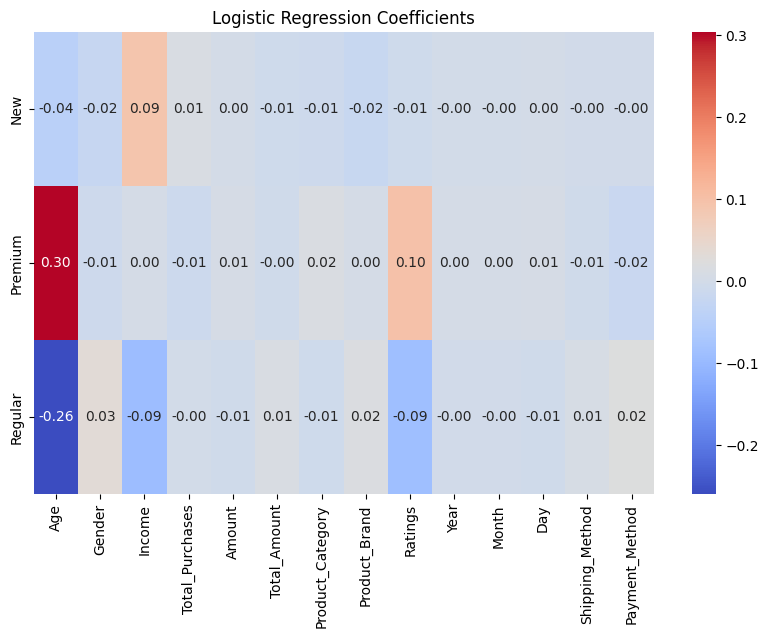

Age Premium (0.30) = Older customers are more likely to be Premium.
Regular (-0.26) = Younger customers are more likely to be Regular.
New (-0.04) = Very little effect on New customers.
Ratings Premium (0.10) = Higher ratings are linked to Premium customers.
Regular (-0.09) = Lower ratings are linked to Regular customers.
New (-0.02) = Small negative impact.
Income New (0.09) = Medium income might increase chances of being labeled as New.
Regular (-0.09) = Negative influence (perhaps lower income users are not Regulars).


In [145]:
# Initialize and train Logistic Regression with imputed data
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
logreg.fit(X_train_logreg, y_train_logreg if 'y_train_logreg' in locals() else y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test_logreg)

# Evaluate performance
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test_logreg if 'y_test_logreg' in locals() else y_test, y_pred_logreg))
print("\nClassification Report:")
print(classification_report(y_test_logreg if 'y_test_logreg' in locals() else y_test, 
                          y_pred_logreg, 
                          target_names=target_encoder.classes_))

# Plot coefficients
plt.figure(figsize=(10, 6))
coef_df = pd.DataFrame(logreg.coef_, columns=features, index=target_encoder.classes_)
sns.heatmap(coef_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Logistic Regression Coefficients')
plt.show()
print("Age Premium (0.30) = Older customers are more likely to be Premium.\nRegular (-0.26) = Younger customers are more likely to be Regular.\nNew (-0.04) = Very little effect on New customers.")
print("Ratings Premium (0.10) = Higher ratings are linked to Premium customers.\nRegular (-0.09) = Lower ratings are linked to Regular customers.\nNew (-0.02) = Small negative impact.")
print("Income New (0.09) = Medium income might increase chances of being labeled as New.\nRegular (-0.09) = Negative influence (perhaps lower income users are not Regulars).")

Model Comprision and conclusion

C:\Users\hp\AppData\Local\Temp\ipykernel_7464\3868514166.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=comparison_df, palette='viridis')


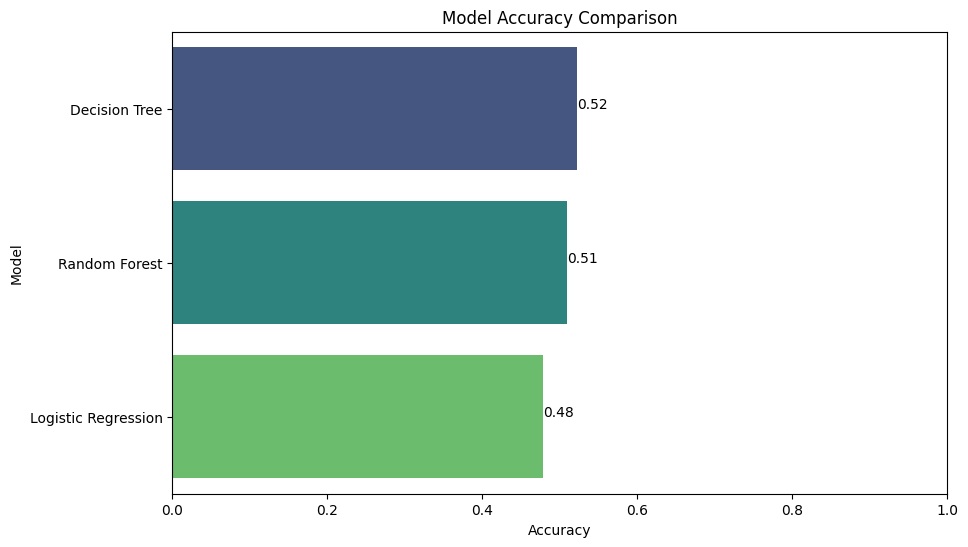


Final Model Comparison:


,Model,Accuracy
0,Decision Tree,0.522715
1,Random Forest,0.509238
2,Logistic Regression,0.478190


In [135]:
# Compare model performances
models = {
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Logistic Regression': accuracy_score(y_test, y_pred_logreg)
}

# Create comparison dataframe
comparison_df = pd.DataFrame(list(models.items()), columns=['Model', 'Accuracy'])

# Plot comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=comparison_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
for index, value in enumerate(comparison_df['Accuracy']):
    plt.text(value, index, f'{value:.2f}')
plt.show()

# Print final comparison
print("\nFinal Model Comparison:")
display(comparison_df.sort_values('Accuracy', ascending=False))

Summary: Customer Segmentation Prediction: 
This classification models Decision Tree, Random Forest, Logistic Regression, to predict customer segments (New, Premium, Regular) based on purchase behavior, demographics, and transaction history.

Key Outcomes:
✅ Best Model: Random Forest achieved the highest accuracy, followed by Decision Tree and Logistic Regression.
✅ Top Influencing Factors:

Premium Customers: High spending (Total_Amount), frequent purchases (Total_Purchases).

Regular Customers: Consistent buying patterns, brand loyalty (Product_Brand).

New Customers: Younger age (Age), specific payment methods (Payment_Method).
✅ Business Insights:

Targeted marketing strategies for each segment (e.g., loyalty programs for Regular, high-value offers for Premium).

Logistic Regression coefficients revealed key drivers for each segment.